In [45]:
import pandas as pd
import numpy as np

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)


In [9]:
data_path = "C:/Users/Admin/BE PROJECT/Data/final_used_preprocessed.csv"

df = pd.read_csv(data_path)

In [12]:
df.drop(labels="Unnamed: 0",axis=1,inplace = True)

In [30]:
df.dropna(inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46548 entries, 0 to 46551
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    46548 non-null  object
 1   label   46548 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [32]:
def make_split(text: str, length: int = 480, buffer: int = 50):
    total: List[str] = []
    split = text.strip().split()
    jump: int = length - buffer
    start = 0; end = jump
    while start <= len(split):
        cur = split[start: end + buffer]
        start = end + 1
        end = start + jump
        total.append(" ".join(cur))
    return total

In [33]:
df['split'] = df["text"].apply(make_split)

In [35]:
df

,text,label,split
0,way bob corker skewer donald trump image copyr...,1,[way bob corker skewer donald trump image copy...
1,linklaters war veteran comedy speak modern ame...,1,[linklaters war veteran comedy speak modern am...
2,trump fight corker jeopardize legislative agen...,1,[trump fight corker jeopardize legislative age...
3,egypts cheiron win tieup pemex mexican onshore...,1,[egypts cheiron win tieup pemex mexican onshor...
4,jason aldean open snl vegas tribute country si...,1,[jason aldean open snl vegas tribute country s...
...,...,...,...
46547,rapper unload black celebrity meet donald trum...,0,[rapper unload black celebrity meet donald tru...
46548,green bay packers lose washington redskins wee...,0,[green bay packers lose washington redskins we...
46549,macy today grow union great name american reta...,0,[macy today grow union great name american ret...
46550,nato russia hold parallel exercise balkans pre...,1,[nato russia hold parallel exercise balkans pr...


In [36]:
def make_dataframe(df: pd.DataFrame, data_col: str = "text",label_col: str = "label", split_col: str = "split"):
    data: List[str] = []
    label: List[str] = []
    index: List[int] = []
    for idx, row in df.iterrows():
        for e in row[split_col]:
            data.append(e)
            label.append(row[label_col])
            index.append(idx)
    return  pd.DataFrame({"index": index, data_col: data, label_col: label})

In [39]:
df = make_dataframe(df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61073 entries, 0 to 61072
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   61073 non-null  int64 
 1   text    61073 non-null  object
 2   label   61073 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


[Text(0, 0, '0'), Text(0, 0, '1')]

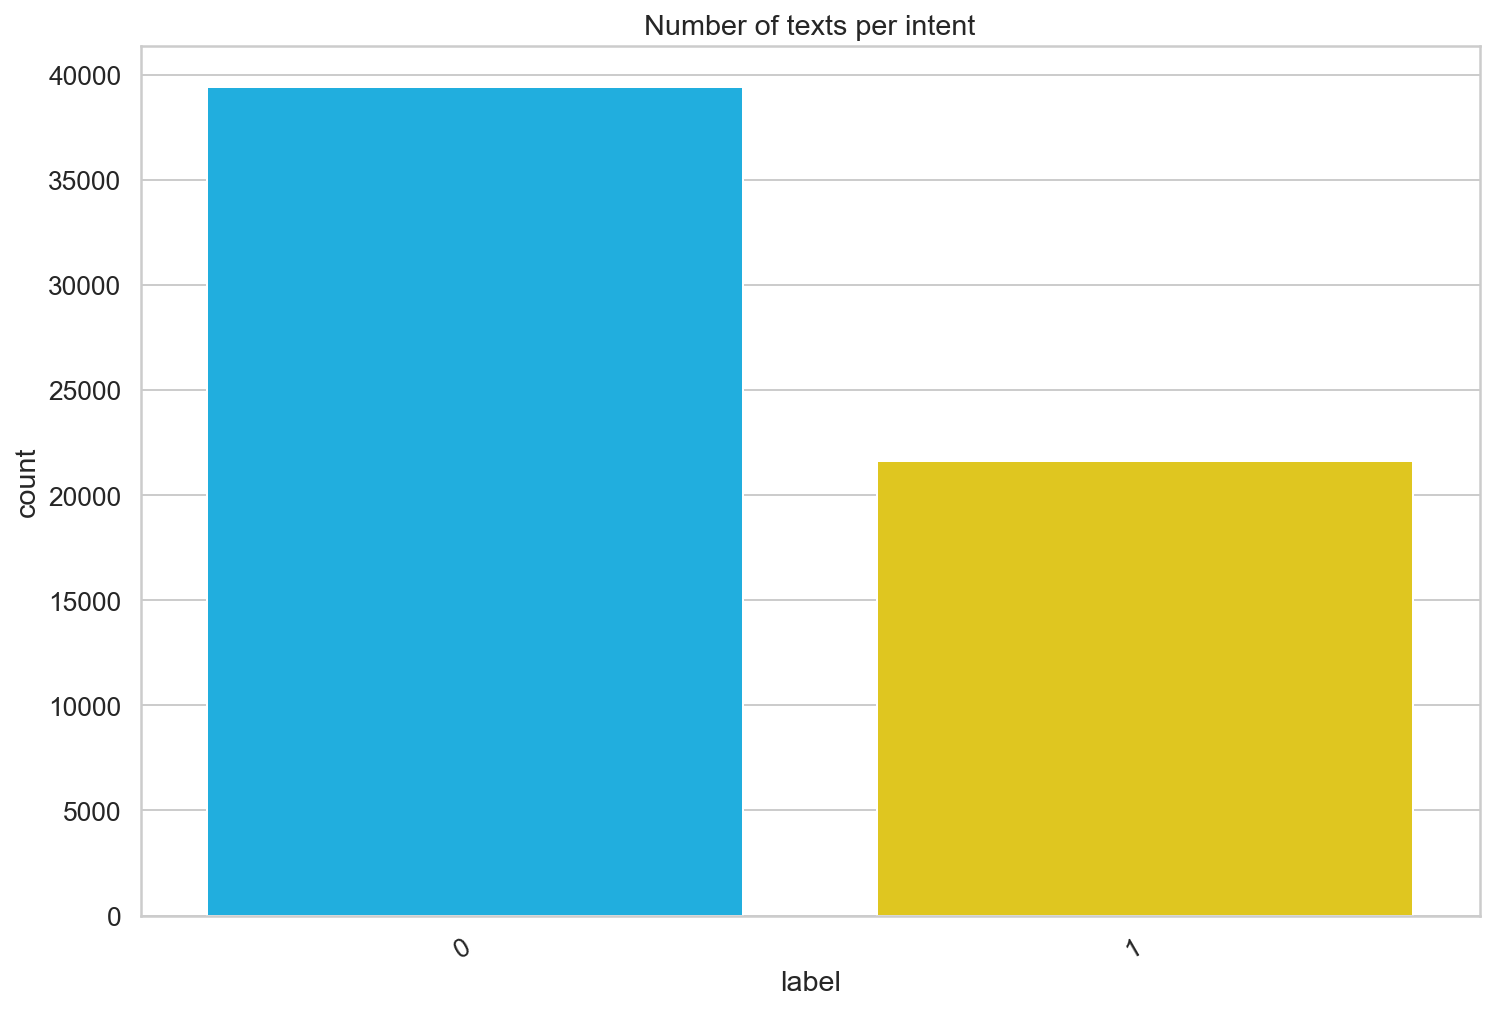

In [46]:
chart = sns.countplot(df.label, palette=HAPPY_COLORS_PALETTE)
plt.title("Number of texts per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')

In [47]:
df.to_csv('final_used_preprocessed_split.csv')